In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('helper_functions.py','wb').write(src)
import helper_functions

Saving helper_functions.py to helper_functions.py


In [ ]:
import helper_functions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install transformers
from transformers import pipeline
from helper_functions import *

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.8 MB/s 
     |████████████████████████████████| 7.6 MB 38.4 MB/s 
     |████████████████████████████████| 163 kB 50.4 MB/s 


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Eliminator_LabelHandled.csv',index_col = [0])

In [ ]:
df

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,sentiment,cost,ease of use,effective,efficient,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count
7464,Garden,67336,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-08-06T00:00:00,2021,8,31,NaN,For ants and fleas works great and the price ...,Positive,NaN,NaN,1.0,NaN,organic reviews,2.97,5,0,0,0,No,for ants and fleas works great and the price ...,8/6/21,21
7465,Garden,67337,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-06-29T00:00:00,2021,6,26,Eliminator ant killer works the best,These ant granules work great. Sprinkle and th...,Positive,NaN,NaN,1.0,NaN,organic reviews,2.97,5,0,0,0,No,these ant granules work great. sprinkle and th...,6/29/21,47
7466,Garden,67338,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-07-10T00:00:00,2021,7,27,It works well,This stuff really works well,Positive,NaN,NaN,1.0,NaN,organic reviews,2.97,5,0,0,0,No,this stuff really works well,7/10/21,5
7467,Garden,67339,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-06-16T00:00:00,2021,6,24,"review of Eliminator Ant, Flea and Tick Killer...",be sure you make sure you get the right one. T...,Negative,NaN,NaN,NaN,1.0,organic reviews,2.97,3,0,0,0,No,be sure you make sure you get the right one. t...,6/16/21,19
7468,Garden,67340,"Eliminator Ant, Flea & Tick Killer Plus Granul...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,55283731,55283735,No,2021-06-08T00:00:00,2021,6,23,NaN,it works real quick I seen a different right away,Positive,NaN,NaN,NaN,1.0,organic reviews,5.86,5,0,0,0,No,it works real quick i seen a different right away,6/8/21,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28339,Garden,150251,"Eliminator Total Vegetation Killer Herbicide, ...",https://www.walmart.com//ip/Eliminator-Total-V...,Walmart,Eliminator,669105534,935703842,Yes,2022-06-16T00:00:00,2022,6,24,Okay,You have to mix it very strong. I add a couple...,NaN,NaN,NaN,NaN,NaN,organic reviews,16.96,3,0,0,0,No,you have to mix it very strong. i add a couple...,6/16/22,62
28412,Garden,150324,Eliminator Ready-to-Use Weed & Grass Killer He...,https://www.walmart.com//ip/Eliminator-Ready-t...,Walmart,Eliminator,490858787,599339955,Yes,2022-06-26T00:00:00,2022,6,25,Product works!!!,Love it only place I can find the eliminator b...,NaN,NaN,NaN,NaN,NaN,organic reviews,2.88,5,0,0,0,No,love it only place i can find the eliminator b...,6/26/22,15
28413,Garden,150325,"Eliminator Weed & Grass Killer Herbicide, Gall...",https://www.walmart.com//ip/Eliminator-Weed-Gr...,Walmart,Eliminator,316196077,316196077,Yes,2022-06-26T00:00:00,2022,6,25,Product works!!!,Love it only place I can find the eliminator b...,NaN,NaN,NaN,NaN,NaN,organic reviews,7.48,5,0,0,0,No,love it only place i can find the eliminator b...,6/26/22,15
28414,Garden,150326,"Eliminator Ready-to-Use Weed & Grass Killer, H...",https://www.walmart.com//ip/Eliminator-Ready-t...,Walmart,Eliminator,599339955,490858787,Yes,2022-06-26T00:00:00,2022,6,25,Product works!!!,Love it only place I can find the eliminator b...,NaN,NaN,NaN,NaN,NaN,organic reviews,14.68,5,0,0,0,No,love it only place i can find the eliminator b...,6/26/22,15


In [ ]:
#replace NaN in label columns with 0
columns = ['cost','ease of use', 'effective', 'efficient']

for column in columns:
    df[column] = df[column].replace(np.nan, int(0))

In [ ]:
df

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,sentiment,cost,ease of use,effective,efficient,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count
7464,Garden,67336,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-08-06T00:00:00,2021,8,31,NaN,For ants and fleas works great and the price ...,Positive,0.0,0.0,1.0,0.0,organic reviews,2.97,5,0,0,0,No,for ants and fleas works great and the price ...,8/6/21,21
7465,Garden,67337,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-06-29T00:00:00,2021,6,26,Eliminator ant killer works the best,These ant granules work great. Sprinkle and th...,Positive,0.0,0.0,1.0,0.0,organic reviews,2.97,5,0,0,0,No,these ant granules work great. sprinkle and th...,6/29/21,47
7466,Garden,67338,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-07-10T00:00:00,2021,7,27,It works well,This stuff really works well,Positive,0.0,0.0,1.0,0.0,organic reviews,2.97,5,0,0,0,No,this stuff really works well,7/10/21,5
7467,Garden,67339,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-06-16T00:00:00,2021,6,24,"review of Eliminator Ant, Flea and Tick Killer...",be sure you make sure you get the right one. T...,Negative,0.0,0.0,0.0,1.0,organic reviews,2.97,3,0,0,0,No,be sure you make sure you get the right one. t...,6/16/21,19
7468,Garden,67340,"Eliminator Ant, Flea & Tick Killer Plus Granul...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,55283731,55283735,No,2021-06-08T00:00:00,2021,6,23,NaN,it works real quick I seen a different right away,Positive,0.0,0.0,0.0,1.0,organic reviews,5.86,5,0,0,0,No,it works real quick i seen a different right away,6/8/21,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28339,Garden,150251,"Eliminator Total Vegetation Killer Herbicide, ...",https://www.walmart.com//ip/Eliminator-Total-V...,Walmart,Eliminator,669105534,935703842,Yes,2022-06-16T00:00:00,2022,6,24,Okay,You have to mix it very strong. I add a couple...,NaN,0.0,0.0,0.0,0.0,organic reviews,16.96,3,0,0,0,No,you have to mix it very strong. i add a couple...,6/16/22,62
28412,Garden,150324,Eliminator Ready-to-Use Weed & Grass Killer He...,https://www.walmart.com//ip/Eliminator-Ready-t...,Walmart,Eliminator,490858787,599339955,Yes,2022-06-26T00:00:00,2022,6,25,Product works!!!,Love it only place I can find the eliminator b...,NaN,0.0,0.0,0.0,0.0,organic reviews,2.88,5,0,0,0,No,love it only place i can find the eliminator b...,6/26/22,15
28413,Garden,150325,"Eliminator Weed & Grass Killer Herbicide, Gall...",https://www.walmart.com//ip/Eliminator-Weed-Gr...,Walmart,Eliminator,316196077,316196077,Yes,2022-06-26T00:00:00,2022,6,25,Product works!!!,Love it only place I can find the eliminator b...,NaN,0.0,0.0,0.0,0.0,organic reviews,7.48,5,0,0,0,No,love it only place i can find the eliminator b...,6/26/22,15
28414,Garden,150326,"Eliminator Ready-to-Use Weed & Grass Killer, H...",https://www.walmart.com//ip/Eliminator-Ready-t...,Walmart,Eliminator,599339955,490858787,Yes,2022-06-26T00:00:00,2022,6,25,Product works!!!,Love it only place I can find the eliminator b...,NaN,0.0,0.0,0.0,0.0,organic reviews,14.68,5,0,0,0,No,love it only place i can find the eliminator b...,6/26/22,15


**Sentiment Analysis**

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = [None] * len(df)
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
df['sentiment_m'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60
80
100
120
140
160
180
200
220
240
260


**Zero-Shot Classifier**

In [ ]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
type = ['cost', 'efficient', 'effective', 'ease of use']

In [ ]:
#setting empty values for the columns
index = -1
for label in type:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    if(index%20 == 0): 
        print(index)
        
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['review_lower'],
        candidate_labels = type,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0
20
40
60
80
100
120
140
160
180
200
220
240
260


In [14]:
# create a "max" column for metric purposes
df['max'] = df[['cost_m', 'efficient_m', 'effective_m', 'ease of use_m']].max(axis=1)
df.head(3)

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,sentiment,cost,ease of use,effective,efficient,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment_m,cost_m,efficient_m,effective_m,ease of use_m,max
7464,Garden,67336,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-08-06T00:00:00,2021,8,31,NaN,For ants and fleas works great and the price ...,Positive,0.0,0.0,1.0,0.0,organic reviews,2.97,5,0,0,0,No,for ants and fleas works great and the price ...,8/6/21,21,Positive,0.952968,0.968863,0.997902,0.979306,0.997902
7465,Garden,67337,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-06-29T00:00:00,2021,6,26,Eliminator ant killer works the best,These ant granules work great. Sprinkle and th...,Positive,0.0,0.0,1.0,0.0,organic reviews,2.97,5,0,0,0,No,these ant granules work great. sprinkle and th...,6/29/21,47,Positive,0.765568,0.993307,0.997978,0.968285,0.997978
7466,Garden,67338,"Eliminator Ant, Flea and Tick Killer Granules,...",https://www.walmart.com//ip/Eliminator-Ant-Fle...,Walmart,Eliminator,807844780,807844780,No,2021-07-10T00:00:00,2021,7,27,It works well,This stuff really works well,Positive,0.0,0.0,1.0,0.0,organic reviews,2.97,5,0,0,0,No,this stuff really works well,7/10/21,5,Positive,0.179327,0.996241,0.998811,0.974390,0.998811


In [43]:
from google.colab import drive
drive.mount('drive')
df.to_csv('eliminator_afterzero.csv')
!cp eliminator_afterzero.csv "drive/My Drive/"

Mounted at drive


**Insights**

In [15]:

#assign the max to its aligned type
align_list=[]
j = 0
for i in range(len(df)):
  for t in type:
    if df[t+'_m'].iloc[i] == df['max'].iloc[i]:
      # print(i)
      # print(df[t+'_m'].iloc[i])
      align_list.append(t)

df['align_type']=align_list

In [16]:
# Create Pivot table for the Heatmap
table_count = pd.pivot_table(df, values='max', index=['sentiment'], columns=['align_type'], aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)
table_count

align_type,cost,ease of use,effective,efficient,All
sentiment,,,,,
Negative,11,0,1,0,12
Neutral,1,1,6,1,9
Positive,3,8,63,4,78
All,15,9,70,5,99


In [17]:
#count the percentage
table2 = table_count.div( table_count.iloc[-1,:], axis=1 ).applymap('{:.0%}'.format)
table2=table2.drop('All').drop(labels='All', axis=1)
table2

align_type,cost,ease of use,effective,efficient
sentiment,,,,
Negative,73%,0%,1%,0%
Neutral,7%,11%,9%,20%
Positive,20%,89%,90%,80%


In [18]:
#Drop "ALL" column and row
table_count=table_count.drop('All').drop(labels='All', axis=1)

#reshape results
results=np.asarray(table2)

#check results
results

array([['73%', '0%', '1%', '0%'],
       ['7%', '11%', '9%', '20%'],
       ['20%', '89%', '90%', '80%']], dtype=object)

<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

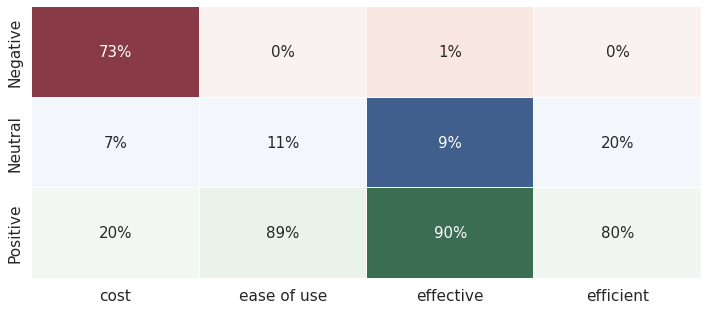

In [20]:
plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table_count.copy()
data1.loc['Negative'] = float('nan')
data1.loc['Neutral'] = float('nan')
ax=sns.heatmap(data1, annot=results, cmap="Greens",alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['Negative'] = float('nan')
data2.loc['Positive'] = float('nan')
ax=sns.heatmap(data2, annot=results, cmap="Blues", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table_count.copy()
data3.loc['Positive'] = float('nan')
data3.loc['Neutral'] = float('nan')
ax=sns.heatmap(data3, annot=results, cmap="Reds", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

In [21]:
# Treemap
from collections import defaultdict
import plotly
import plotly.express as px

data =  pd.DataFrame.from_dict(df)
fig = px.treemap(data, path=['sentiment_m', 'align_type'])

fig.data[0].textinfo = 'label+text+value'
fig.data[0]['textfont']['color'] = "white"
fig.data[0]['textfont']['size'] = 15
fig.data[0].textposition = 'middle center'

fig.layout.hovermode = False

fig.show()

**For 5 start rating reviews**

In [22]:
df_5 = df[df['rating'] == 5]

Text(0.5, 1.0, 'Top 10 Products with 5 Ratings')

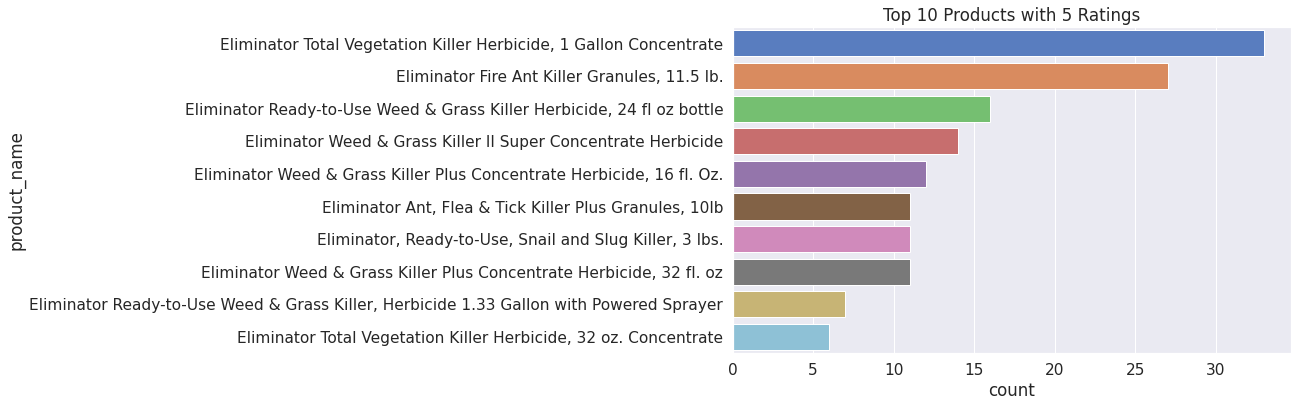

In [23]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Top 10 Products with 5 Ratings');
sns.countplot(y = 'product_name', data = df_5, order = df_5['product_name'].value_counts()[0:10].index, palette = "muted")
#plt.savefig('figs/negative_homedepot', bbox_inches = 'tight');

**N-Gram**

In [24]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [25]:
## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in df_5["review_lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



**Heatmap**

In [30]:
# Create Pivot table for the Heatmap
table_count = pd.pivot_table(df_5, values='max', index=['sentiment_m'], columns=['align_type'], aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)

#count the percentage
table2 = table_count.div( table_count.iloc[-1,:], axis=1 ).applymap('{:.0%}'.format)
table2=table2.drop('All').drop(labels='All', axis=1)


#Drop "ALL" column and row
table_count=table_count.drop('All').drop(labels='All', axis=1)

#reshape results
results=np.asarray(table2)

<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

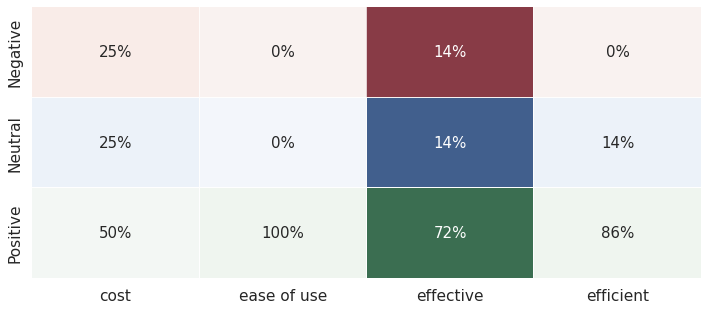

In [31]:
plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table_count.copy()
data1.loc['Negative'] = float('nan')
data1.loc['Neutral'] = float('nan')
ax=sns.heatmap(data1, annot=results, cmap="Greens",alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['Negative'] = float('nan')
data2.loc['Positive'] = float('nan')
ax=sns.heatmap(data2, annot=results, cmap="Blues", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table_count.copy()
data3.loc['Positive'] = float('nan')
data3.loc['Neutral'] = float('nan')
ax=sns.heatmap(data3, annot=results, cmap="Reds", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

**For 1 Star Rated Reviews**

In [32]:
df_1 = df[df['rating'] == 1]

Text(0.5, 1.0, 'Top 10 Products with 1 Ratings')

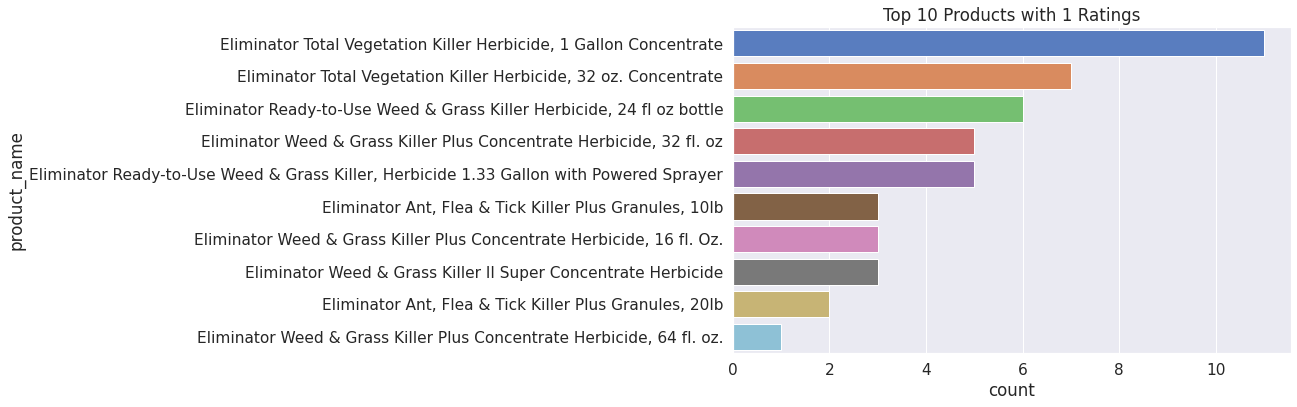

In [33]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Top 10 Products with 1 Ratings');
sns.countplot(y = 'product_name', data = df_1, order = df_1['product_name'].value_counts()[0:10].index, palette = "muted")
#plt.savefig('figs/negative_homedepot', bbox_inches = 'tight');

In [34]:
## Get the bar chart from 1 rated reviews ##
freq_dict = defaultdict(int)
for sent in df_1["review_lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [44]:
# Create Pivot table for the Heatmap
table_count = pd.pivot_table(df_1, values='max', index=['sentiment_m'], columns=['align_type'], aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)

#count the percentage
table2 = table_count.div( table_count.iloc[-1,:], axis=1 ).applymap('{:.0%}'.format)
table2=table2.drop('All').drop(labels='All', axis=1)


#Drop "ALL" column and row
table_count=table_count.drop('All').drop(labels='All', axis=1)
table_count.loc['Positive'] = 0
table2.loc['Positive'] = "{0:.0%}".format(0)

#reshape results
results=np.asarray(table2)



<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

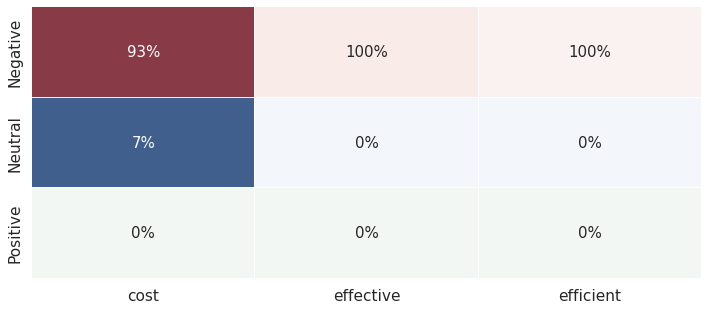

In [45]:
## Heatmap
plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table_count.copy()
data1.loc['Negative'] = float('nan')
data1.loc['Neutral'] = float('nan')
ax=sns.heatmap(data1, annot=results, cmap="Greens",alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['Negative'] = float('nan')
data2.loc['Positive'] = float('nan')
ax=sns.heatmap(data2, annot=results, cmap="Blues", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table_count.copy()
data3.loc['Positive'] = float('nan')
data3.loc['Neutral'] = float('nan')
ax=sns.heatmap(data3, annot=results, cmap="Reds", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

In [ ]:
df.to_csv('insight_eliminator.csv')